# Training Model - SMOTE

# Import Library


In [46]:
#import all realated libraries
#import libraries for data analysis
import numpy as np
import pandas as pd

# import library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import pickle and json file for columns and model file
import pickle
import json
import joblib
import yaml
import scipy.stats as scs
import src.util as util

# import warnings for ignore the warnings
import warnings 
warnings.filterwarnings("ignore")

# library for model selection and models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

# evaluation metrics for classification model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

import json
from datetime import datetime
#import datetime as dt
import uuid

In [47]:
params_dir = "config/config.yaml"

In [48]:
def load_params(param_dir):
    with open(param_dir, 'r') as file:
        params = yaml.safe_load(file)
        
    return params

In [49]:
#load config data
config_data = util.load_config()

In [50]:
#Read data X_train dan y_sm hasil dari data preparation
X_sm_clean = util.pickle_load(config_data["standar_scaler_sm"][0])
y_sm = util.pickle_load(config_data["standar_scaler_sm"][1])

#Read data X_valid dan y_valid hasil dari data preparation
X_valid_clean = util.pickle_load(config_data["standar_scaler_valid"][0])
y_valid = util.pickle_load(config_data["standar_scaler_valid"][1])

#Read data X_test dan y_test hasil dari data preparation
X_test_clean = util.pickle_load(config_data["standar_scaler_test"][0])
y_test = util.pickle_load(config_data["standar_scaler_test"][1])

In [51]:
#sanity check
X_sm_clean

,C1,C10,C11,C12,C13,C14,C2,C3,C4,C5,...,card4_discover,card4_empty,card4_mastercard,card4_visa,card5,card6_charge card,card6_credit,card6_debit,card6_debit or credit,card6_empty
0,-0.097170,-0.084263,-0.113520,-0.084443,-0.173159,-0.089850,-0.119697,-0.02847,-0.092114,-0.170119,...,0,0,0,1,0.709765,0,0,1,0,0
1,-0.097170,-0.084263,-0.113520,-0.084443,-0.187089,-0.120332,-0.119697,-0.02847,-0.092114,-0.170119,...,0,0,1,0,0.662599,0,0,1,0,0
2,-0.113201,-0.084263,-0.113520,-0.084443,-0.103511,-0.105091,-0.124260,-0.02847,-0.092114,-0.120069,...,0,0,0,1,0.709765,0,0,1,0,0
3,-0.118545,-0.084263,-0.113520,-0.084443,-0.187089,-0.120332,-0.124260,-0.02847,-0.092114,-0.120069,...,0,0,0,1,0.709765,0,1,0,0,0
4,-0.118545,-0.084263,-0.113520,-0.084443,-0.173159,-0.120332,-0.119697,-0.02847,-0.092114,-0.170119,...,0,0,1,0,0.662599,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797929,-0.118545,-0.084263,-0.113520,-0.084443,-0.173503,-0.120332,-0.124260,-0.02847,-0.092114,-0.146330,...,0,0,0,0,-1.311529,0,0,1,0,0
797930,-0.118015,-0.084263,-0.113520,-0.084443,-0.186399,-0.118822,-0.124260,-0.02847,-0.092114,-0.165160,...,0,0,1,0,0.059655,0,0,1,0,0
797931,-0.097170,-0.084263,-0.098360,-0.084443,-0.054757,-0.074609,-0.115135,-0.02847,-0.092114,-0.170119,...,0,0,0,1,0.709765,0,0,1,0,0
797932,-0.116202,-0.075531,-0.103091,-0.065233,-0.187089,-0.120332,-0.111991,-0.02847,-0.068929,-0.170119,...,0,0,0,1,-2.214524,0,1,0,0,0


In [41]:
#sanity check
y_sm

0         0
1         0
2         0
3         0
4         0
         ..
797929    1
797930    1
797931    1
797932    1
797933    1
Name: isFraud, Length: 797934, dtype: int64

In [42]:
#sanity check
X_valid_clean

,C1,C10,C11,C12,C13,C14,C2,C3,C4,C5,...,card4_discover,card4_empty,card4_mastercard,card4_visa,card5,card6_charge card,card6_credit,card6_debit,card6_debit or credit,card6_empty
504494,-0.118545,-0.069562,-0.113520,-0.084443,-0.187089,-0.120332,-0.124260,-0.02847,-0.081812,-0.170119,...,0,0,1,0,-0.705213,0,0,1,0,0
454181,-0.118545,-0.084263,-0.113520,-0.084443,-0.117441,-0.120332,-0.124260,-0.02847,-0.092114,-0.170119,...,0,0,1,0,-1.860779,0,0,1,0,0
497372,-0.118545,-0.076913,-0.113520,-0.076358,-0.187089,-0.120332,-0.124260,-0.02847,-0.081812,-0.170119,...,0,0,0,1,0.709765,0,1,0,0,0
418123,-0.107858,-0.084263,-0.098360,-0.084443,-0.124406,-0.089850,-0.119697,-0.02847,-0.092114,-0.120069,...,0,0,0,1,0.709765,0,0,1,0,0
387902,-0.118545,-0.084263,-0.113520,-0.084443,-0.187089,-0.120332,-0.119697,-0.02847,-0.092114,-0.120069,...,0,0,1,0,-1.648532,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171690,-0.118545,-0.084263,-0.113520,-0.084443,-0.187089,-0.120332,-0.124260,-0.02847,-0.092114,-0.120069,...,0,0,0,1,0.709765,0,1,0,0,0
478699,-0.102514,-0.084263,-0.105940,-0.084443,-0.019933,-0.074609,-0.119697,-0.02847,-0.092114,-0.070019,...,0,0,0,1,0.709765,0,0,1,0,0
351637,-0.118545,-0.084263,-0.113520,-0.084443,-0.145300,-0.120332,-0.124260,-0.02847,-0.092114,-0.170119,...,0,0,0,1,0.709765,0,0,1,0,0
300019,-0.113201,-0.076913,-0.113520,-0.076358,-0.180124,-0.105091,-0.115135,-0.02847,-0.071510,-0.170119,...,0,0,0,1,-1.365536,0,0,1,0,0


In [43]:
#sanity check
y_valid

504494    1
454181    0
497372    0
418123    0
387902    0
         ..
171690    0
478699    0
351637    0
300019    0
434151    0
Name: isFraud, Length: 106297, dtype: int64

In [44]:
#sanity check
X_test_clean

,C1,C10,C11,C12,C13,C14,C2,C3,C4,C5,...,card4_discover,card4_empty,card4_mastercard,card4_visa,card5,card6_charge card,card6_credit,card6_debit,card6_debit or credit,card6_empty
26703,-0.107858,-0.084263,-0.09078,-0.084443,-0.117441,-0.089850,-0.110572,-0.02847,-0.092114,-0.120069,...,0,0,1,0,0.143774,0,0,1,0,0
2877,-0.118545,-0.084263,-0.11352,-0.084443,-0.124406,-0.120332,-0.119697,-0.02847,-0.092114,-0.120069,...,0,0,0,1,0.709765,0,0,1,0,0
350334,-0.113201,-0.069562,-0.11352,-0.084443,-0.180124,-0.105091,-0.119697,-0.02847,-0.081812,-0.170119,...,0,0,1,0,0.544684,0,1,0,0,0
236126,-0.102514,-0.084263,-0.10594,-0.084443,-0.075652,-0.089850,-0.115135,-0.02847,-0.092114,-0.120069,...,0,0,0,1,0.709765,0,0,1,0,0
404743,-0.102514,-0.084263,-0.10594,-0.084443,-0.103511,-0.089850,-0.115135,-0.02847,-0.092114,-0.120069,...,0,0,1,0,0.662599,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280531,-0.113201,-0.084263,-0.11352,-0.084443,-0.124406,-0.105091,-0.124260,-0.02847,-0.092114,0.080132,...,0,0,0,1,0.709765,0,0,1,0,0
516994,-0.118545,-0.084263,-0.11352,-0.084443,-0.187089,-0.120332,-0.119697,-0.02847,-0.092114,-0.070019,...,0,0,0,1,0.709765,0,0,1,0,0
347517,-0.118545,-0.084263,-0.11352,-0.084443,-0.173159,-0.120332,-0.124260,-0.02847,-0.092114,-0.170119,...,0,0,0,1,0.709765,0,0,1,0,0
34139,-0.107858,-0.084263,-0.11352,-0.084443,-0.131370,-0.089850,-0.124260,-0.02847,-0.092114,-0.170119,...,0,0,0,1,-0.705213,0,0,1,0,0


In [45]:
#sanity check
y_test

26703     0
2877      0
350334    0
236126    0
404743    0
         ..
280531    0
516994    0
347517    0
34139     0
320755    0
Name: isFraud, Length: 70865, dtype: int64

## Extratrees Classifier

In [15]:
# fungsi untuk melakukan model binary extratrees
def binary_classification_extratrees(x_train, y_train, x_valid, y_valid, x_test, y_test):
    # Instantiate the classifier
    extratrees_clf = ExtraTreesClassifier(random_state=123)
    
    # Train the model
    extratrees_clf.fit(x_train, y_train)
    
    # Evaluate on validation set
    valid_pred = extratrees_clf.predict(x_valid)
    valid_acc = accuracy_score(y_valid, valid_pred)
    print('Validation accuracy:', valid_acc)
    
    # Evaluate on test set
    test_pred = extratrees_clf.predict(x_test)
    test_acc = accuracy_score(y_test, test_pred)
    print('Test accuracy:', test_acc)
    
    return extratrees_clf

In [16]:
#fitting dan pembuatan model
extra_trees_awal = binary_classification_extratrees(x_train = X_sm_clean, y_train = y_sm, \
                                           x_valid = X_valid_clean, y_valid = y_valid, \
                                           x_test = X_test_clean, y_test = y_test)

Validation accuracy: 0.9782967614478233
Test accuracy: 0.9782496213439702


In [17]:
#check score
extra_trees_awal.score(X_sm_clean, y_sm)

0.999913526682658

In [18]:
# coba prediksi
y_extratress_pred = extra_trees_awal.predict(X_test_clean)

In [19]:
# melihat classification report
print(classification_report(y_test, y_extratress_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    102546
           1       0.79      0.52      0.63      3751

    accuracy                           0.98    106297
   macro avg       0.89      0.76      0.81    106297
weighted avg       0.98      0.98      0.98    106297



In [20]:
#Check evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_extratress_pred)
precision = precision_score(y_test, y_extratress_pred)
recall = recall_score(y_test, y_extratress_pred)
f1 = f1_score(y_test, y_extratress_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9782496213439702
Precision: 0.7881457749299159
Recall: 0.5246600906424953
F1 Score: 0.6299615877080665


AUC: 0.9008013962384915


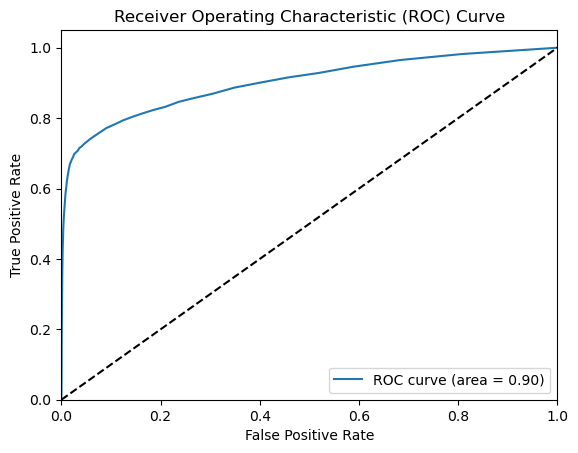

In [21]:
from sklearn.metrics import roc_curve, auc

# predict probabilities for the positive class
probs = extra_trees_awal.predict_proba(X_test_clean)[:, 1]

# calculate fpr and tpr for various thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# calculate AUC
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('roc_auc.png')
plt.show()

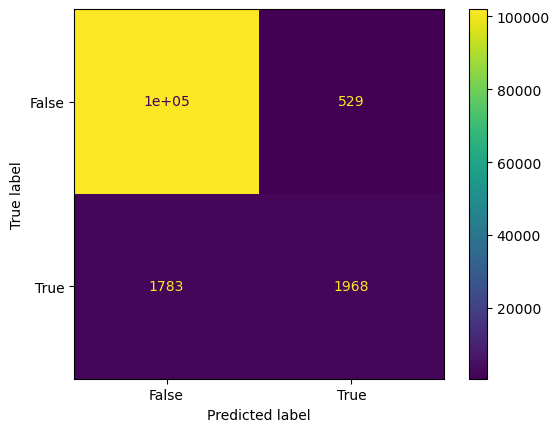

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, y_extratress_pred, display_labels = [False, True])
plt.savefig('confu_extratrees.png')
plt.show()

In [23]:
print(f"Training Data Score: {extra_trees_awal.score(X_sm_clean, y_sm)}")
print(f"Validating Data Score: {extra_trees_awal.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {extra_trees_awal.score(X_test_clean, y_test)}")

Training Data Score: 0.999913526682658
Validating Data Score: 0.9782967614478233
Testing Data Score: 0.9782496213439702


In [25]:
# Get the feature importance
feature_importance = extra_trees_awal.feature_importances_

# Create a dataframe to store the feature importance
importance_df = pd.DataFrame({"Feature": X_sm_clean.columns, "Importance": feature_importance})

# Sort the dataframe by importance values in descending order
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Print the feature importance
print(importance_df)

                            Feature    Importance
22                             M1_T  3.319263e-02
25                             M2_T  3.138345e-02
296                     card6_debit  3.008330e-02
33                         M4_empty  2.996557e-02
101                     ProductCD_W  2.779487e-02
..                              ...           ...
90        P_emaildomain_yahoo.co.uk  8.442633e-06
21                             M1_F  6.732787e-06
83   P_emaildomain_servicios-ta.com  6.428719e-06
297           card6_debit or credit  2.662426e-06
191                            V305  7.574094e-10

[299 rows x 2 columns]


## Save Log Best Model

In [26]:
#Save model log
def save_model_log(model, model_name, X_test, y_test):
    # generate unique id
    model_uid = uuid.uuid4().hex
    
    # get current time and date
    now = datetime.now()
    training_time = now.strftime("%H:%M:%S")
    training_date = now.strftime("%Y-%m-%d")
    
    # generate classification report
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # create dictionary for log
    log = {"model_name": model_name,
           "model_uid": model_uid,
           "training_time": training_time,
           "training_date": training_date,
           "classification_report": report}
    
    # menyimpan log sebagai file JSON
    with open('training_log/training_log.json', 'w') as f:
        json.dump(log, f)

In [27]:
#Save model log
save_model_log(model = extra_trees_awal, model_name = "extra_trees_model", X_test = X_test_clean, y_test=y_test)

## Evaluation Metrics

In [28]:
import pandas as pd
from sklearn.metrics import classification_report

# definisikan model-model yang ingin dibandingkan
models = {
          'extra_trees_awal':extra_trees_awal
         }

# loop untuk menghitung dan menyimpan metrik untuk setiap model
results = {}
for name, model in models.items():
    # hitung prediksi pada data test
    y_pred = model.predict(X_test_clean)
    # hitung metrik
    report = classification_report(y_test, y_pred, output_dict=True)
    # simpan metrik ke dictionary
    results[name] = {
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1_score': report['weighted avg']['f1-score'],
        'accuracy': report['accuracy'],
        'macro_avg_precision': report['macro avg']['precision'],
        'macro_avg_recall': report['macro avg']['recall'],
        'macro_avg_f1_score': report['macro avg']['f1-score'],
        'weighted_avg_precision': report['weighted avg']['precision'],
        'weighted_avg_recall': report['weighted avg']['recall'],
        'weighted_avg_f1_score': report['weighted avg']['f1-score']
    }

# buat dataframe dari dictionary
df_results = pd.DataFrame.from_dict(results, orient='index')

# tampilkan dataframe sebagai tabel
df_results

,precision,recall,f1_score,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1_score
extra_trees_awal,0.975953,0.97825,0.976133,0.97825,0.885484,0.759751,0.809379,0.975953,0.97825,0.976133


## Save Model

## Extratrees Classifier

In [29]:
extra_trees_model = 'model/5 - Model Final/extra_trees_model.pkl'
with open(extra_trees_model, 'wb') as file:
    pickle.dump(extra_trees_awal, file)

## Cara Load Model

In [ ]:
# Load model dari folder models
"""
filename = 'models/model.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)
"''"